In [2]:
# ____ DIRECT ADDRESS TABLES ___________

class DATable:
	def __init__(self,maxsize = 10):
		self.table = [None] * 10
		self.size = maxsize

	def set_entry(self,value, pos):
		self.table[pos] = value
		return(0)

	def clear_entry(self,pos):
		self.table[pos] = None
		return(0)

	def __str__(self):
		return("Table: %s" % self.table)

testTable = DATable()
print(testTable)
testTable.set_entry('hi',2)
testTable.set_entry('bye',5)
print(testTable)
testTable.clear_entry(2)
print(testTable)

Table: [None, None, None, None, None, None, None, None, None, None]
Table: [None, None, 'hi', None, None, 'bye', None, None, None, None]
Table: [None, None, None, None, None, 'bye', None, None, None, None]


In [3]:
# using DA Table to store a conuntry's id numbers is a terrible idea
## 1. we don't know what the maximum value will be, populations keep growing
## 2. it will need to be unreasonably large (v high maximum value)
## 3. even if we could hypothetically set an infinite max val, it would be
##    a huge waste of memory.

In [4]:
# ______ CHAINED HASH TABLE _____________

import random
import string


def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))


def empty_hash_table(N):
    return [[] for n in range(N)]


def add_to_hash_table(hash_table, item, hash_function):
    N = len(hash_table)
    pos = hash_function(item) % N
    hash_table[pos].append(item)
    return hash_table


def contains(hash_table, item, hash_function):
    N = len(hash_table)
    pos = hash_function(item) % N
    return(item in hash_table[pos])

def remove(hash_table, item, hash_function):
    if not contains(hash_table, item, hash_function):
        raise ValueError()
    pos = hash_function(item) % N
    hash_table[pos].remove(item)    
    return hash_table


def hash_str1(string):
    ans = 0
    for chr in string:
        ans += ord(chr)
    return ans


def hash_str2(string):
    ans = 0
    for chr in string:
        ans = ans ^ ord(chr)
    return ans


def hash_str3(string):
    ans = 0
    for chr in string:
        ans = ans * 128 + ord(chr)
    return ans


def hash_str4(string):
    random.seed(ord(string[0]))
    return random.getrandbits(32)

In [5]:
# main code
list_of_words = [randomword(10) for n in range(100000)]
hashTable_1 = empty_hash_table(5000)
hashTable_2 = empty_hash_table(5000)
hashTable_3 = empty_hash_table(5000)
hashTable_4 = empty_hash_table(5000)

for word in list_of_words:
	add_to_hash_table(hashTable_1, word, hash_str1)
	add_to_hash_table(hashTable_2, word, hash_str2)
	add_to_hash_table(hashTable_3, word, hash_str3)
	add_to_hash_table(hashTable_4, word, hash_str4)

In [8]:
# counting collisions
coll_in_ht1 = [(len(pos)-1) if (len(pos) > 0) else 0 for pos in hashTable_1]
coll_in_ht2 = [(len(pos)-1) if (len(pos) > 0) else 0 for pos in hashTable_2]
coll_in_ht3 = [(len(pos)-1) if (len(pos) > 0) else 0 for pos in hashTable_3]
coll_in_ht4 = [(len(pos)-1) if (len(pos) > 0) else 0 for pos in hashTable_4]
print('Collisions: ')
print('Table 1 had %s collisions' % sum(coll_in_ht1))
print('Table 2 had %s collisions' % sum(coll_in_ht2))
print('Table 3 had %s collisions' % sum(coll_in_ht3))
print('Table 4 had %s collisions' % sum(coll_in_ht4))


Collisions: 
Table 1 had 99823 collisions
Table 2 had 99968 collisions
Table 3 had 95000 collisions
Table 4 had 99974 collisions


In [14]:
import matplotlib.pyplot as plt

p1 = plt.hist(coll_in_ht1)

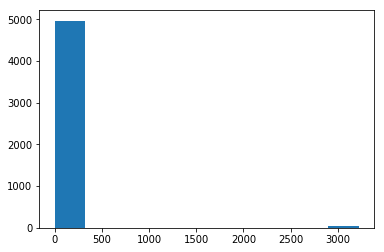

In [15]:
p2 = plt.hist(coll_in_ht2)

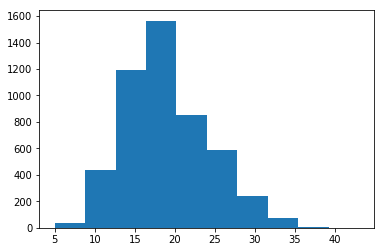

In [16]:
p3 = plt.hist(coll_in_ht3)

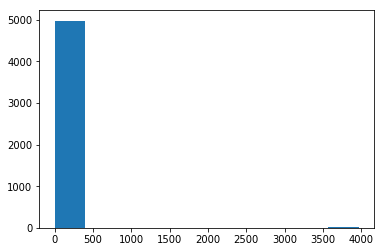

In [17]:
p4 = plt.hist(coll_in_ht4)

In [18]:
import numpy as np

# avg elems in bucket

avg_stored1 = np.median([len(pos) for pos in hashTable_1])
avg_stored2 = np.median([len(pos) for pos in hashTable_2])
avg_stored3 = np.median([len(pos) for pos in hashTable_3])
avg_stored4 = np.median([len(pos) for pos in hashTable_4])

print('Average elems in bucket: ')
print('Table 1: %s' % avg_stored1)
print('Table 2: %s' % avg_stored2)
print('Table 3: %s' % avg_stored3)
print('Table 4: %s' % avg_stored4)


Average elems in bucket: 
Table 1: 0.0
Table 2: 0.0
Table 3: 20.0
Table 4: 0.0


In [19]:
import timeit
def time_taken(func, *arg):
    start = timeit.timeit()
    func(*arg)
    end = timeit.timeit()
    return(end-start)

to_lookup = 'hello'

add_to_hash_table(hashTable_1, to_lookup, hash_str1)
add_to_hash_table(hashTable_2, to_lookup, hash_str2)
add_to_hash_table(hashTable_3, to_lookup, hash_str3)
add_to_hash_table(hashTable_4, to_lookup, hash_str4)

# time lookup
N = 100
time1=0
time2=0
time3=0
time4=0
for i in range(N):
    time1 += (time_taken(contains, hashTable_1, to_lookup, hash_str1))
    time2 += (time_taken(contains, hashTable_2, to_lookup, hash_str2))
    time3 += (time_taken(contains, hashTable_3, to_lookup, hash_str3))
    time4 += (time_taken(contains, hashTable_4, to_lookup, hash_str4))

print('Time for %s lookups' % N)
print('Table 1 : %s' % time1)
print('Table 2 : %s' % time2)
print('Table 3 : %s' % time3)
print('Table 4 : %s' % time4)


Time for 100 lookups
Table 1 : -0.04822310499997684
Table 2 : -0.06601292300017292
Table 3 : -0.044415294999851085
Table 4 : -0.04711597699987635


In [20]:
absent = 'bye'
# time lookup
N = 100
timen1=0
timen2=0
timen3=0
timen4=0
for i in range(N):
    timen1 += (time_taken(contains, hashTable_1, absent, hash_str1))
    timen2 += (time_taken(contains, hashTable_2, absent, hash_str2))
    timen3 += (time_taken(contains, hashTable_3, absent, hash_str3))
    timen4 += (time_taken(contains, hashTable_4, absent, hash_str4))

print('Time for %s lookups for absent elem' % N)
print('Table 1 : %s' % timen1)
print('Table 2 : %s' % timen2)
print('Table 3 : %s' % timen3)
print('Table 4 : %s' % timen4)

Time for 100 lookups for absent elem
Table 1 : -0.004592345000332898
Table 2 : 6.358300018405316e-05
Table 3 : -0.0016187979999244817
Table 4 : -0.004115979999824049
